<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

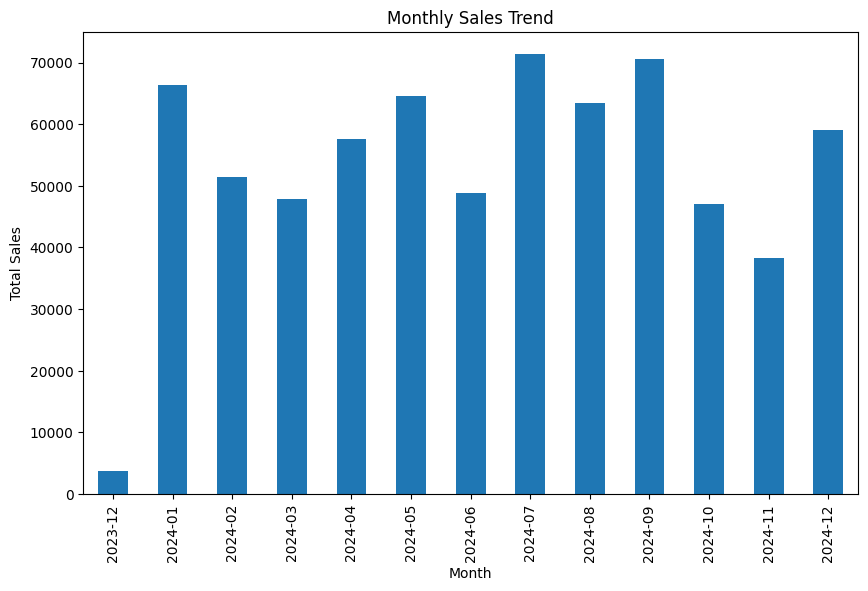

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
# Replace file paths with the actual paths to the downloaded CSV files
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")
# Quick overview of datasets
print(customers.info())
print(products.info())
print(transactions.info())

# Merging datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Top customers by total transaction value
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Top-selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Sales trends over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_trend = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plotting
plt.figure(figsize=(10, 6))
sales_trend.plot(kind='bar')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [12]:
print(merged_data.columns)
print(merged_data.head())




Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      

In [14]:
# Calculate 'Price' from 'TotalValue' and 'Quantity' if it doesn't exist
if 'Price' not in merged_data.columns:
    merged_data['Price'] = merged_data['TotalValue'] / merged_data['Quantity']



In [15]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price': 'mean'  # Now using the calculated Price column
}).reset_index()


In [16]:
# Ensure transactions and products have been merged correctly
merged_data = transactions.merge(products, on="ProductID", how="left").merge(customers, on="CustomerID", how="left")


In [17]:
print(merged_data.head())  # Inspect data rows


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x                      ProductName     Category  Price_y  \
0      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
1      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
2      300.68   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
3      601.36   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   
4      902.04   300.68  ComfortLiving Bluetooth Speaker  Electronics   300.68   

      CustomerName         Region  SignupDate  
0   Andrea Jenkins         Europe  202

Davies-Bouldin Index: 0.9467058109377833


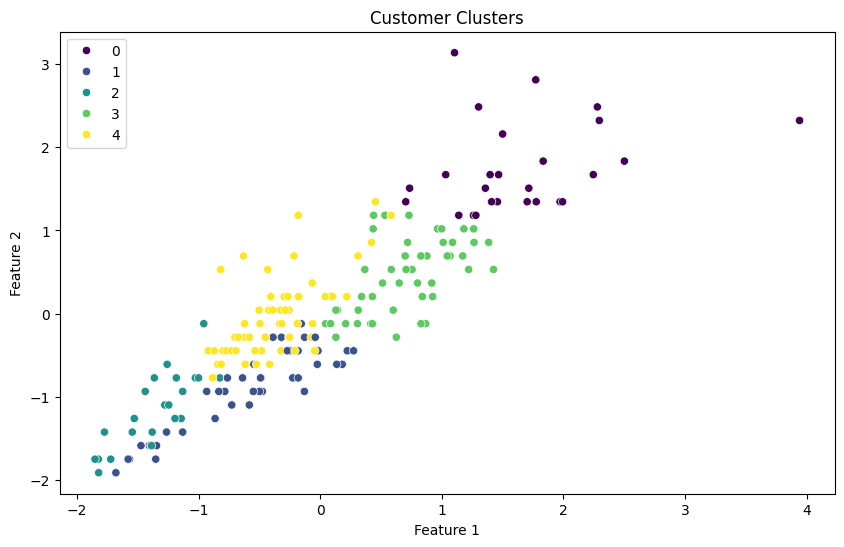

In [20]:
# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Adding cluster labels
customer_features['Cluster'] = clusters

# Evaluating clustering
db_index = davies_bouldin_score(features_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=clusters, palette='viridis')
plt.title("Customer Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load datasets (ensure the file paths are correct)
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
merged_data = transactions.merge(products, on="ProductID", how="left").merge(customers, on="CustomerID", how="left")

# Calculate Price if it does not exist
if 'Price' not in merged_data.columns:
    merged_data['Price'] = merged_data['TotalValue'] / merged_data['Quantity']

# Feature engineering: Aggregate features for each customer
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total transaction value
    'Quantity': 'sum',         # Total quantity purchased
    'Price': 'mean'            # Average price paid
}).reset_index()

# Normalize the data (scaling features for the lookalike model)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.iloc[:, 1:])

# Build Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=4, metric='euclidean')
nn_model.fit(features_scaled)

# Finding lookalikes for the first 20 customers
lookalike_results = {}
for idx, customer in enumerate(customer_features['CustomerID'][:20]):
    distances, indices = nn_model.kneighbors([features_scaled[idx]])
    lookalike_results[customer] = [(customer_features['CustomerID'][i], distances[0][j])
                                   for j, i in enumerate(indices[0][1:])]

# Convert results into a DataFrame
lookalike_df = pd.DataFrame(
    [(key, look[0], look[1]) for key, looks in lookalike_results.items() for look in looks],
    columns=['CustomerID', 'LookalikeID', 'SimilarityScore']
)

# Save results to a CSV file
lookalike_df.to_csv("FirstName_LastName_Lookalike.csv", index=False)

# Display the first few rows of the lookalike results
print(lookalike_df.head())



  CustomerID LookalikeID  SimilarityScore
0      C0001       C0070         0.000000
1      C0001       C0137         0.129332
2      C0001       C0191         0.220628
3      C0002       C0029         0.000000
4      C0002       C0157         0.044942


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# One-Hot Encoding for 'Region' Column
region_encoded = pd.get_dummies(customers['Region'], prefix='Region')

# Merge One-Hot Encoded Region Features with Customers
customers_with_regions = pd.concat([customers, region_encoded], axis=1)

# Merge All Datasets
merged_data = transactions.merge(products, on="ProductID", how="left") \
                          .merge(customers_with_regions, on="CustomerID", how="left")

# Calculate 'Price' if it does not exist
if 'Price' not in merged_data.columns:
    merged_data['Price'] = merged_data['TotalValue'] / merged_data['Quantity']

# Add Weighted Value Feature
merged_data['WeightedValue'] = merged_data['TotalValue'] * 1.5

# Dynamically Identify One-Hot Encoded Region Columns
region_columns = [col for col in merged_data.columns if col.startswith('Region_')]

# Aggregate Features (Include Region Features Dynamically)
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',           # Total transaction value
    'Quantity': 'sum',             # Total quantity purchased
    'Price': 'mean',               # Average price paid
    **{col: 'max' for col in region_columns}  # Include one-hot encoded region features
}).reset_index()

# Scale Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.iloc[:, 1:])

# Build Nearest Neighbors Model Using Cosine Similarity
nn_model = NearestNeighbors(n_neighbors=4, metric='cosine')
nn_model.fit(features_scaled)



NearestNeighbors(metric='cosine', n_neighbors=4)